In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('data/transactions.csv')
df[df.client_id == '0bacbc2abd314f9fac031d249e485a7b']

client_id gender  birth_date create_date  \
3       0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
4       0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
17523   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
17524   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
24751   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
24752   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
29446   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
29447   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
48405   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
48406   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
50896   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
50897   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
67215   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
67216   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
78038   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
78039   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
90058   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
90059   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
95298   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
95299   0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
111054  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
111055  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
124952  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
124953  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
131863  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
131864  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
149445  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
149446  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
164564  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
164565  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
168287  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
168288  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
188814  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
188815  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
195443  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
195444  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
211781  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
211782  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
222344  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
222345  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
239966  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
239967  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
254476  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
254477  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
265017  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
265018  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
288682  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
288683  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   

       nonresident_flag  businessman_flag   city  term  contract_sum  \
3                     R                 0  Томск   NaN           0.0   
4                     R                 0  Томск   NaN           0.0   
17523                 R                 0  Томск   NaN           0.0   
17524                 R                 0  Томск   NaN           0.

<AxesSubplot:>

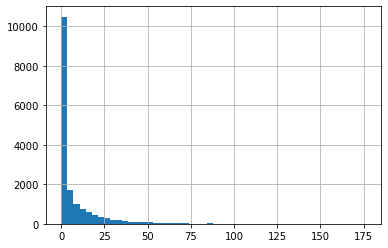

In [9]:
df.groupby("client_id").purchase_count.mean().hist(bins=50)

In [18]:
a = df.groupby("client_id").purchase_count.mean()
mean = a.mean()
std = a.std()
mean + 2*std

34.29863318166262

Будем считать, что активные пользователи - это те, у кого транзакций за месяц больше чем среднее + 2 стандартных отклонений

In [19]:
threshold = mean + 2*std

### Нам интереснее всего, чтобы было много активных транзакций. Посмотрим на профиль такого человека

In [21]:
clients_purchase = df.groupby("client_id").purchase_count.mean()
clients_purchase_active = clients_purchase[clients_purchase > threshold]
clients_purchase_active.sort_values()

client_id
5baf16103c73be5c5d2d58e4f1405fa3     34.333333
586b9b53d69ab3bcbe4186a9ef3a17b4     34.333333
c29c61abb01138a54224663dec36c1d3     34.333333
feace340560a97a50110eacd68c05213     34.333333
411fea8b97ea876d02b7f35ae4c77be3     34.333333
                                       ...    
429fd3db99508792a1da9c8262db4f48    128.500000
dff015339cfacda693c21c72655df3f5    146.000000
e525c10917cd8e07df92e01e381a17a9    150.416667
7e775d62f6b5a266082c708613a3cc18    169.800000
41b72481e5135ca79ff675b6b1ccdf32    176.208333
Name: purchase_count, Length: 843, dtype: float64

In [22]:
df[df.client_id == '41b72481e5135ca79ff675b6b1ccdf32']

client_id gender  birth_date create_date  \
4999    41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
14759   41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
22462   41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
31342   41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
48472   41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
57933   41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
65064   41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
72249   41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
82797   41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
97901   41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
112903  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
125893  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
132049  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
146818  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
157658  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
171377  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
179156  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
203565  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
217365  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
231200  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
245612  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
259947  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
274463  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   
289312  41b72481e5135ca79ff675b6b1ccdf32      М        1987  2013-12-20   

       nonresident_flag  businessman_flag  city  term  contract_sum  \
4999                  R                 0  Сочи   NaN      275100.0   
14759                 R                 0  Сочи   NaN      275100.0   
22462                 R                 0  Сочи   NaN      275100.0   
31342                 R                 0  Сочи   NaN      275100.0   
48472                 R                 0  Сочи   NaN      275100.0   
57933                 R                 0  Сочи   NaN      275100.0   
65064                 R                 0  Сочи   NaN      275100.0   
72249                 R                 0  Сочи   NaN      275100.0   
82797                 R                 0  Сочи   NaN      275100.0   
97901                 R                 0  Сочи   NaN      275100.0   
112903                R                 0  Сочи   NaN      275100.0   
125893                R                 0  Сочи   NaN      275100.0   
132049                R                 0  Сочи   NaN      275100.0   
146818                R                 0  Сочи   NaN      275100.0   
157658                R                 0  Сочи   NaN      275100.0   
171377                R                 0  Сочи   NaN      275100.0   
179156                R                 0  Сочи   NaN      275100.0   
203565                R                 0  Сочи   NaN      275100.0   
217365                R                 0  Сочи   NaN      275100.0   
231200                R                 0  Сочи   NaN      275100.0   
245612                R                 0  Сочи   NaN      275100.0   
259947                R                 0  Сочи   NaN      275100.0   
274463                R                 0  Сочи   NaN      275100.0   
289312                R                 0  Сочи   NaN      275100.0   

       product_category_name  ... card_type_name start_date  fact_close_date  \
4999         Кредитная карта  ...            NaN        NaN              NaN   
14759        Кредитная карта  ...            NaN        NaN              NaN   
22462        Кредитная карта  ...            NaN        NaN              NaN   
31342        Кредитная карта  ...            NaN        NaN

In [23]:
df[df.client_id == 'e525c10917cd8e07df92e01e381a17a9']

client_id gender  birth_date create_date  \
362713  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
362757  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
362868  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
362935  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
362997  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
363088  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
363169  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
363294  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
363330  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
363424  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
363595  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
363701  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
363754  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
363896  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
363995  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
364095  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
364210  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
364362  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
364503  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
364608  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
364771  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
364905  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
365017  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   
365134  e525c10917cd8e07df92e01e381a17a9      М        1993  2019-12-02   

       nonresident_flag  businessman_flag   city  term  contract_sum  \
362713                R                 0  Миасс   NaN           0.0   
362757                R                 0  Миасс   NaN           0.0   
362868                R                 0  Миасс   NaN           0.0   
362935                R                 0  Миасс   NaN           0.0   
362997                R                 0  Миасс   NaN           0.0   
363088                R                 0  Миасс   NaN           0.0   
363169                R                 0  Миасс   NaN           0.0   
363294                R                 0  Миасс   NaN           0.0   
363330                R                 0  Миасс   NaN           0.0   
363424                R                 0  Миасс   NaN           0.0   
363595                R                 0  Миасс   NaN           0.0   
363701                R                 0  Миасс   NaN           0.0   
363754                R                 0  Миасс   NaN           0.0   
363896                R                 0  Миасс   NaN           0.0   
363995                R                 0  Миасс   NaN           0.0   
364095                R                 0  Миасс   NaN           0.0   
364210                R                 0  Миасс   NaN           0.0   
364362                R                 0  Миасс   NaN           0.0   
364503                R                 0  Миасс   NaN           0.0   
364608                R                 0  Миасс   NaN           0.0   
364771                R                 0  Миасс   NaN           0.0   
364905                R                 0  Миасс   NaN           0.0   
365017                R                 0  Миасс   NaN           0.0   
365134                R                 0  Миасс   NaN           0.0   

                              product_category_name  ...  \
362713  Договор на текущий счет для дебетовой карты  ...   
362757  Договор на текущий счет для дебетовой карты  ...   
362868  Договор на текущий счет для дебетовой карты  ...   
362935  Договор на текущий счет для дебетовой карты  ...   
362997  Договор на текущий счет для дебетовой карты  .

<AxesSubplot:>

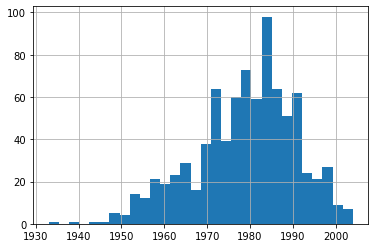

In [32]:
df[df.client_id.isin(clients_purchase_active.index)].groupby('client_id').birth_date.mean().hist(bins=30)

In [35]:
import json
with open("data/active_client.json", 'w') as f:
    json.dump(list(clients_purchase_active.index), f)